<a href="https://colab.research.google.com/github/mafer-saes01/Proyecto_ASE/blob/main/ProyectoASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO ASE- Análisis de Desapariciones de Mujeres en Jalisco** 

In [5]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import io
import pandas as pd
import numpy as np
import seaborn as sns #Para hacer gráficas
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [7]:
from google.colab import files
uploaded=files.upload()

Saving RNPEDFC.csv to RNPEDFC (1).csv


In [8]:
desapariciones_df=pd.read_csv(io.BytesIO(uploaded["RNPEDFC.csv"]), index_col=0, encoding='latin-1')
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


# Contexto 

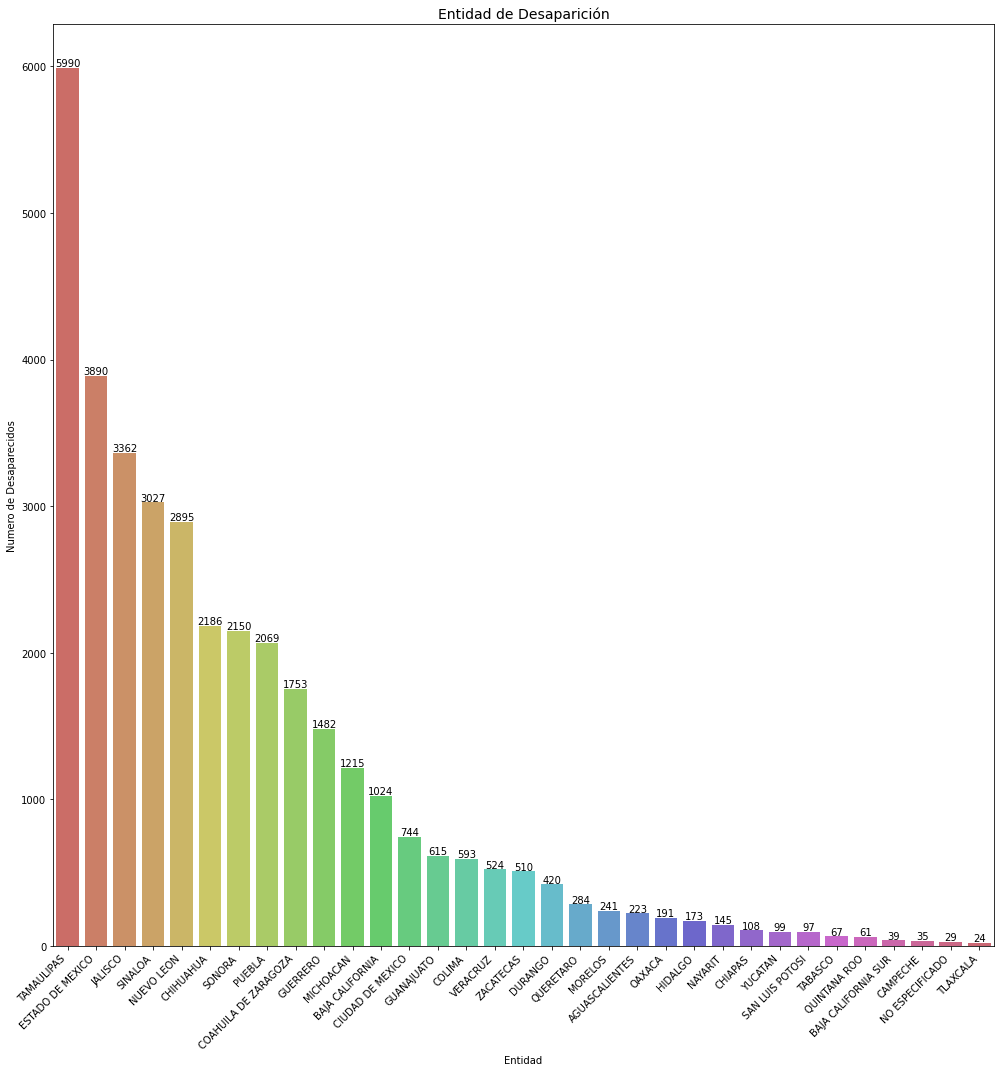

In [9]:
plt.figure(figsize=(14, 15))
ax = sns.countplot( x = 'Entidad', data = desapariciones_df, palette = "hls", order = desapariciones_df['Entidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Entidad de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (desapariciones_df['Entidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

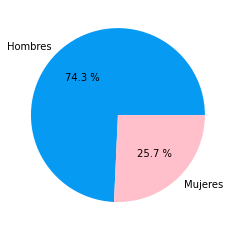

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [10]:
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(desapariciones_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


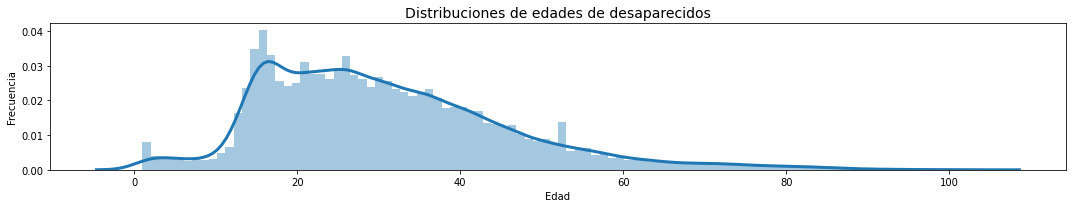

In [11]:
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df["Edad"] = desapariciones_df["Edad"].astype(float)
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(desapariciones_df[(desapariciones_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [12]:
age_distr=pd.DataFrame(desapariciones_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,33109.0,30.801655,15.025777,1.0,20.0,28.0,39.0,103.0


In [13]:
desapariciones_df[desapariciones_df["Edad"] >= 100]

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
36167,12/12/1997,06:00:00,MEXICO,NUEVO LEON,MONTERREY,MONTERREY,MEXICANA,1.68,MEDIANA,HOMBRE,103.0,"USABA BIGOTE, SIN BARBA,OREJAS GRANDES LOBULO ...",NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON


# Limpieza del conjunto de datos

## Se convierte el string "NO ESPECIFICADO" en valores nulos para poder mejorar el uso de la base de datos

In [14]:
desapariciones_df.loc[desapariciones_df["Etnia"] == "NO ESPECIFICADO", "Etnia"] = np.nan
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df.loc[desapariciones_df["Fecha"] == "NO ESPECIFICADO", "Fecha"] = np.nan
desapariciones_df.loc[desapariciones_df["Hora"] == "NO ESPECIFICADO", "Hora"] = np.nan
desapariciones_df.loc[desapariciones_df["Entidad"] == "NO ESPECIFICADO", "Entidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Municipio"] == "NO ESPECIFICADO", "Municipio"] = np.nan
desapariciones_df.loc[desapariciones_df["Localidad"] == "NO ESPECIFICADO", "Localidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Nacionalidad"] == "NO ESPECIFICADO", "Nacionalidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "NO ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "no ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Complexion"] == "NO ESPECIFICADO", "Complexion"] = np.nan
desapariciones_df.loc[desapariciones_df["Sexo"] == "NO ESPECIFICADO", "Sexo"] = np.nan
desapariciones_df.loc[desapariciones_df["Descripcion de senas particulares"] == "NO ESPECIFICADO", "Descripcion de senas particulares"] = np.nan
desapariciones_df.loc[desapariciones_df["Discapacidad"] == "NO ESPECIFICADO", "Discapacidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Dependencia que envio la informacion"] == "NO ESPECIFICADO", "Dependencia que envio la informacion"] = np.nan

## Se realiza una columna de fecha y hora con el formato DateTime

In [15]:
desapariciones_df["Fecha_hora"] = pd.to_datetime(desapariciones_df['Fecha']+" "+desapariciones_df['Hora'], infer_datetime_format=True)
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7.0,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NaN,NINGUNO,FGE - SONORA,2012-03-18 05:00:00
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2007-02-05 02:00:26
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6.0,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2009-03-14 08:30:54
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10.0,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2006-12-23 08:00:28
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2008-01-11 12:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22.0,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NaN,NINGUNO,FGE - PUEBLA,2018-04-26 08:00:00
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27.0,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NaN,NINGUNO,PGJ - COLIMA,2018-01-08 11:00:00
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2015-02-02 07:00:00
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41.0,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NaN,NINGUNO,PGJ - COLIMA,2017-08-22 04:00:00


In [16]:
desapariciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36265 entries, 1 to 36265
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Fecha                                 35927 non-null  object        
 1   Hora                                  36249 non-null  object        
 2   Pais                                  36265 non-null  object        
 3   Entidad                               36236 non-null  object        
 4   Municipio                             35597 non-null  object        
 5   Localidad                             32852 non-null  object        
 6   Nacionalidad                          34225 non-null  object        
 7   Estatura                              25257 non-null  object        
 8   Complexion                            25696 non-null  object        
 9   Sexo                                  36265 non-null  object        
 10

## Borramos los datos de cualquier entidad distinta de Jalisco


In [17]:
jalisco_df=desapariciones_df[desapariciones_df["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.7,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.8,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00


## Se rellenan los valores faltantes

In [18]:
# Se determinan los valores faltantes para analizar como se van a tratar
jalisco_df.isna().sum()

Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                 48
Localidad                                118
Nacionalidad                               3
Estatura                                 208
Complexion                               142
Sexo                                       0
Edad                                      34
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

In [19]:
#Se cambian los valores de los datos de estatura
jalisco_df["Estatura"] = jalisco_df["Estatura"].astype(float)
jalisco_df["Estatura"] = jalisco_df["Estatura"].fillna(jalisco_df["Estatura"].mean())
#Se cambia los valores de los datos de edades
jalisco_df["Edad"] = jalisco_df["Edad"].astype(float)
jalisco_df["Edad"] = jalisco_df["Edad"].fillna(jalisco_df["Edad"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
jalisco_df['Municipio'].mode()

0    GUADALAJARA
dtype: object

In [21]:
jalisco_df["Municipio"] = jalisco_df["Municipio"].fillna("GUADALAJARA")
jalisco_df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                  0
Localidad                                118
Nacionalidad                               3
Estatura                                   0
Complexion                               142
Sexo                                       0
Edad                                       0
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

## Se realiza una columna nueva que diga el rango de edad al que pertenece la persona que desapareció

In [22]:
jalisco_df["Rango de Edad"]=""
jalisco_df.loc[(jalisco_df["Edad"]>=0) &
                (jalisco_df["Edad"]<=4),"Rango de Edad"]="0-4"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=5) &
                (pd.to_numeric(jalisco_df["Edad"])<=9),"Rango de Edad"]="5-9"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=10) &
                (pd.to_numeric(jalisco_df["Edad"])<=14),"Rango de Edad"]="10-14"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=15) &
                (pd.to_numeric(jalisco_df["Edad"])<=19),"Rango de Edad"]="15-19"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=20) &
                (pd.to_numeric(jalisco_df["Edad"])<=24),"Rango de Edad"]="20-24"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=25) &
                (pd.to_numeric(jalisco_df["Edad"])<=29),"Rango de Edad"]="25-29"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=30) &
                (pd.to_numeric(jalisco_df["Edad"])<=34),"Rango de Edad"]="30-34"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=35) &
                (pd.to_numeric(jalisco_df["Edad"])<=39),"Rango de Edad"]="35-39"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=40) &
                (pd.to_numeric(jalisco_df["Edad"])<=54),"Rango de Edad"]="40-54"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=55) &
                (pd.to_numeric(jalisco_df["Edad"])<=59),"Rango de Edad"]="55-59"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=60) &
                (pd.to_numeric(jalisco_df["Edad"])<=64),"Rango de Edad"]="60-64"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=65) &
                (pd.to_numeric(jalisco_df["Edad"])<=69),"Rango de Edad"]="65-69"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=70) &
                (pd.to_numeric(jalisco_df["Edad"])<=74),"Rango de Edad"]="70-74"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=75) &
                (pd.to_numeric(jalisco_df["Edad"])<=79),"Rango de Edad"]="75-79"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=80),"Rango de Edad"]=">80"
jalisco_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00,40-54


## Se elimina las columnas que no serán necesarias para el proyecto

In [23]:
jalisco_df=jalisco_df.drop(['Etnia'], axis=1) # porque hay muchos datos faltantes. Es decir, a la hora de hacer el reporte no se tuvo en cuenta.
jalisco_df=jalisco_df.drop(['Localidad'], axis=1) #Ya que sabemos que todos los desaparecidos son de jalisco, no es encesario tener en la columna de qué estado es la persona
jalisco_df=jalisco_df.drop(['Entidad'], axis=1)
jalisco_df=jalisco_df.drop(['Discapacidad'], axis=1)
jalisco_df=jalisco_df.drop(['Pais'], axis=1)
jalisco_df=jalisco_df.drop(['Fecha'], axis=1)
jalisco_df=jalisco_df.drop(['Hora'], axis=1)
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54


In [24]:
jalisco_df['Dia']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).day # Por que se crean estas columnas y para que?
jalisco_df['Mes']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).month
jalisco_df['Año']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).year
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


In [25]:
jalisco_df['Estatura'] = jalisco_df['Estatura'].apply(lambda x: x*100)
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


# Análisis del conjunto de datos

## Se analiza en qué municipios hay más desapariciones

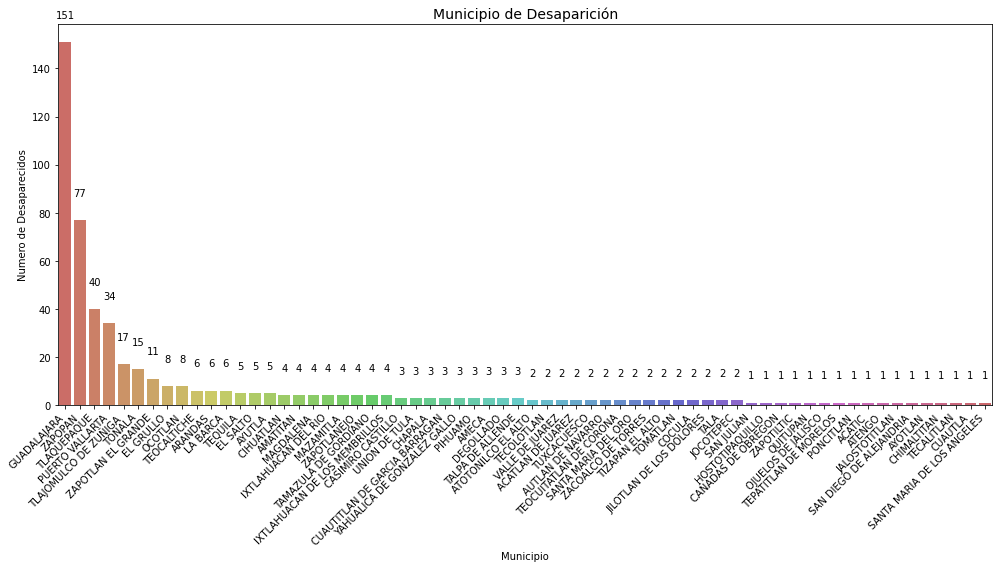

In [28]:
grafica_df=jalisco_df.head(500)

plt.figure(figsize=(14, 8))
ax = sns.countplot( x = 'Municipio', data = grafica_df, palette = "hls", order = grafica_df['Municipio'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Municipio de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (grafica_df['Municipio'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

## Se analiza el género de los desaparecidos en Jalisco

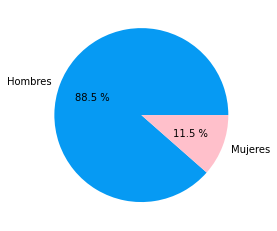

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [29]:
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(jalisco_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

## Se analizan las edades de los desaparecidos en Jalisco

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


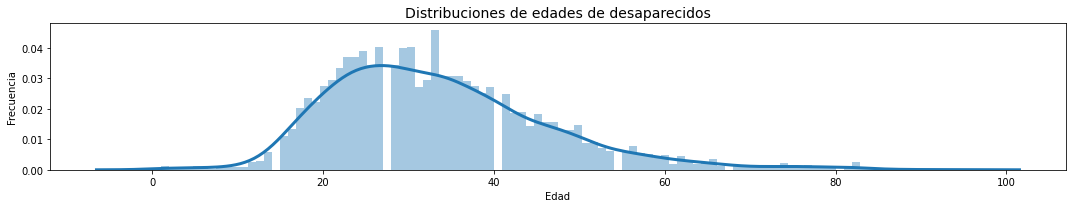

In [30]:
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [31]:
age_distr=pd.DataFrame(jalisco_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,3362.0,33.528846,12.726487,1.0,24.0,32.0,40.0,94.0


## Se analizan las nacionalidades

In [32]:
jalisco_df['Nacionalidad'].value_counts()

MEXICANA          3337
ESTADOUNIDENSE       8
COLOMBIANA           3
ITALIANA             3
CANADIENSE           2
CUBANA               1
ESPAÑOLA             1
GUATEMALTECO         1
HONDUREÑA            1
VENEZOLANA           1
SALVADOREÑA          1
Name: Nacionalidad, dtype: int64

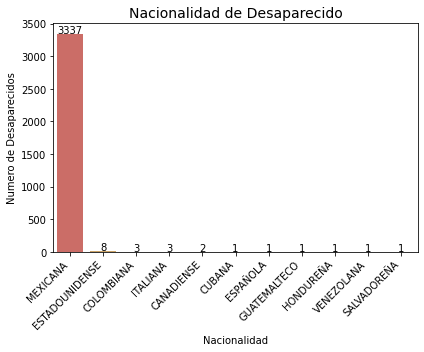

In [33]:
import math

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Nacionalidad', data = jalisco_df, palette = "hls", order = jalisco_df['Nacionalidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Nacionalidad de Desaparecido',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (jalisco_df['Nacionalidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

In [34]:
#¿Los extranjeros solamente desaparecen en los cinco principales destinos 
#turísticos de Jalisco (Chapala, Cihuatlán,Guadalajara,Puerto Vallarta y San Juan de los Lagos)?
extranjeros = jalisco_df[(jalisco_df['Nacionalidad'] != 'MEXICANA') & 
                               ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                               (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                               (jalisco_df['Municipio'] == 'CHAPALA') |
                               (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                               (jalisco_df['Municipio'] == 'CIHUATLAN'))]
extranjeros

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
4724,GUADALAJARA,NaN,185.000000,DELGADA,HOMBRE,79.000000,NaN,FGE - JALISCO,2011-09-01 12:00:00,75-79,1.0,9.0,2011.0
4735,GUADALAJARA,CUBANA,162.000000,DELGADA,MUJER,22.000000,NaN,FGE - JALISCO,2010-11-29 12:00:00,20-24,29.0,11.0,2010.0
4826,CHAPALA,ESTADOUNIDENSE,175.000000,ROBUSTA,HOMBRE,68.000000,NaN,FGE - JALISCO,2011-09-09 07:00:00,65-69,9.0,9.0,2011.0
6919,PUERTO VALLARTA,NaN,170.508244,NaN,MUJER,33.528846,NaN,FGE - JALISCO,2011-03-23 07:30:00,30-34,23.0,3.0,2011.0
12035,PUERTO VALLARTA,ESTADOUNIDENSE,170.000000,DELGADA,HOMBRE,33.000000,NaN,FGE - JALISCO,2013-05-08 05:00:00,30-34,8.0,5.0,2013.0
12036,PUERTO VALLARTA,CANADIENSE,175.000000,DELGADA,HOMBRE,22.000000,TATUAJES EN AMBAS MANOS Y CUELLOS.,FGE - JALISCO,2013-05-08 05:00:00,20-24,8.0,5.0,2013.0
23725,GUADALAJARA,NaN,170.508244,NaN,MUJER,27.000000,NaN,PGJ - GUANAJUATO,2013-02-06 07:00:00,25-29,6.0,2.0,2013.0
24219,PUERTO VALLARTA,CANADIENSE,170.508244,DELGADA,HOMBRE,34.000000,NaN,FGE - JALISCO,2016-03-16 04:00:00,30-34,16.0,3.0,2016.0
24258,GUADALAJARA,ESTADOUNIDENSE,158.000000,DELGADA,HOMBRE,31.000000,CICATRIZ EN EL CUELLO HORIZONTAL DEL LADO IZQU...,FGE - JALISCO,2016-03-21 12:00:00,30-34,21.0,3.0,2016.0
29595,GUADALAJARA,VENEZOLANA,150.000000,DELGADA,MUJER,29.000000,NaN,FGE - JALISCO,2017-02-06 02:10:00,25-29,6.0,2.0,2017.0


## Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas

In [43]:
mexicanos=jalisco_df[(jalisco_df['Nacionalidad'] == 'MEXICANA') & 
                 ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                  (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                  (jalisco_df['Municipio'] == 'CHAPALA') |
                  (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                  (jalisco_df['Municipio'] == 'CIHUATLAN'))]
mexicanos

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4279,CHAPALA,MEXICANA,180.0,DELGADA,HOMBRE,36.0,"TATUAJES QUE DICEN: LOPEZ, UNA VIRGEN Y UNO QU...",FGE - JALISCO,2012-02-06 08:00:00,35-39,6.0,2.0,2012.0
4304,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,28.0,"BRAZO TATUADOS IZQUIERDO TRES ESTRELLAS, EL DE...",FGE - JALISCO,2012-10-14 01:00:00,25-29,14.0,10.0,2012.0
4309,GUADALAJARA,MEXICANA,165.0,ROBUSTA,HOMBRE,45.0,UN TATUAJE DEL SAGRADO CORAZON DE JESUS EN EL ...,FGE - JALISCO,2012-10-26 01:00:00,40-54,26.0,10.0,2012.0
4314,PUERTO VALLARTA,MEXICANA,185.0,DELGADA,HOMBRE,26.0,TIENE UN DIENTE ESTRELLADO EN EL MAXILAR SUPERIOR,FGE - JALISCO,2010-08-21 07:30:00,25-29,21.0,8.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,GUADALAJARA,MEXICANA,175.0,DELGADA,HOMBRE,29.0,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,FGE - JALISCO,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36038,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,22.0,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",FGE - JALISCO,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36067,GUADALAJARA,MEXICANA,165.0,MEDIANA,MUJER,13.0,NaN,FGE - JALISCO,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36069,GUADALAJARA,MEXICANA,140.0,DELGADA,MUJER,20.0,LUNAR EN LA BOCA DEL LADO DERECHO,FGE - JALISCO,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


In [52]:
pd.concat([extranjeros,mexicanos],axis=0)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
4724,GUADALAJARA,NaN,185.000000,DELGADA,HOMBRE,79.000000,NaN,FGE - JALISCO,2011-09-01 12:00:00,75-79,1.0,9.0,2011.0
4735,GUADALAJARA,CUBANA,162.000000,DELGADA,MUJER,22.000000,NaN,FGE - JALISCO,2010-11-29 12:00:00,20-24,29.0,11.0,2010.0
4826,CHAPALA,ESTADOUNIDENSE,175.000000,ROBUSTA,HOMBRE,68.000000,NaN,FGE - JALISCO,2011-09-09 07:00:00,65-69,9.0,9.0,2011.0
6919,PUERTO VALLARTA,NaN,170.508244,NaN,MUJER,33.528846,NaN,FGE - JALISCO,2011-03-23 07:30:00,30-34,23.0,3.0,2011.0
12035,PUERTO VALLARTA,ESTADOUNIDENSE,170.000000,DELGADA,HOMBRE,33.000000,NaN,FGE - JALISCO,2013-05-08 05:00:00,30-34,8.0,5.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,GUADALAJARA,MEXICANA,175.000000,DELGADA,HOMBRE,29.000000,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,FGE - JALISCO,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36038,GUADALAJARA,MEXICANA,170.000000,DELGADA,HOMBRE,22.000000,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",FGE - JALISCO,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36067,GUADALAJARA,MEXICANA,165.000000,MEDIANA,MUJER,13.000000,NaN,FGE - JALISCO,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36069,GUADALAJARA,MEXICANA,140.000000,DELGADA,MUJER,20.000000,LUNAR EN LA BOCA DEL LADO DERECHO,FGE - JALISCO,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


In [54]:
(len(pd.concat([extranjeros,mexicanos],axis=0))/len(jalisco_df))*100

25.81796549672814

## Se analiza las senas particulares

In [55]:
jalisco_df["Descripcion de senas particulares"]=jalisco_df["Descripcion de senas particulares"].fillna("")

#Tatuaje de la Santa Muerte
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Santa Muerte", case=False)), 
                "Santa Muerte"]= 1
jalisco_df["Santa Muerte"]=jalisco_df["Santa Muerte"].fillna(0)

#Tatuaje
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuaje", case=False)), 
                "Tatuaje"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuajes", case=False)), 
                "Tatuaje"]= 1
jalisco_df["Tatuaje"]=jalisco_df["Tatuaje"].fillna(0)

#Cicatriz
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Cicatriz", case=False)), 
                "Cicatriz"]= 1
jalisco_df["Cicatriz"]=jalisco_df["Cicatriz"].fillna(0)

#Lunar
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunar", case=False)), 
                "Lunares"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunares", case=False)), 
                "Lunares"]= 1
jalisco_df["Lunares"]=jalisco_df["Lunares"].fillna(0)

jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [56]:
jalisco_df=jalisco_df.drop(['Descripcion de senas particulares'], axis=1)

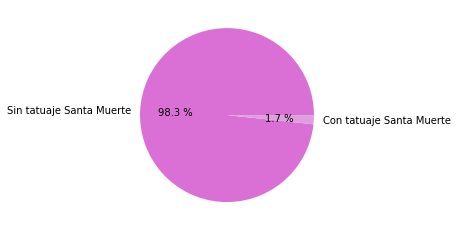

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [57]:
#Tatuaje de la Santa Muerte
mylabels = ["Sin tatuaje Santa Muerte", "Con tatuaje Santa Muerte"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Santa Muerte"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

## Preparación del conjunto de datos para agrupamiento

In [58]:
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [59]:
encoder = LabelEncoder()

jalisco_df['Municipio'] = encoder.fit_transform(jalisco_df['Municipio'])
jalisco_df['Nacionalidad'] = encoder.fit_transform(jalisco_df['Nacionalidad'])
jalisco_df['Dependencia que envio la informacion'] = encoder.fit_transform(jalisco_df['Dependencia que envio la informacion'])
jalisco_df['Rango de Edad'] = encoder.fit_transform(jalisco_df['Rango de Edad'])
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,110,8,165.0,DELGADA,HOMBRE,21.0,1,2006-01-01 12:00:00,3,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,34,8,170.0,ROBUSTA,HOMBRE,23.0,4,2011-07-28 03:00:00,3,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,103,8,180.0,ROBUSTA,HOMBRE,25.0,2,2012-08-08 08:00:00,4,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,52,8,171.0,DELGADA,HOMBRE,27.0,2,2012-08-07 10:30:00,4,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,52,8,175.0,DELGADA,HOMBRE,28.0,2,2012-08-07 09:00:00,4,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,93,8,175.0,MEDIANA,HOMBRE,39.0,2,2017-08-10 09:00:00,6,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,110,8,165.0,ROBUSTA,HOMBRE,24.0,2,2017-09-25 09:30:00,3,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,5,8,165.0,DELGADA,HOMBRE,32.0,2,2017-11-17 11:00:00,5,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,85,8,175.0,MEDIANA,HOMBRE,48.0,2,2017-09-23 05:00:00,7,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [65]:
#jalisco_df=jalisco_df.drop(['Edad'], axis=1)
#jalisco_df=jalisco_df.drop(['Dependencia que envio la informacion'], axis=1)
jalisco_df=jalisco_df.drop(['Fecha_hora'], axis=1)

In [61]:
#Sexo
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("MUJER", na=False, case=False)), 
                "Sexo"]= 1
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("HOMBRE", na=False, case=False)), 
                "Sexo"]= 2

In [62]:
jalisco_df["Sexo"]=jalisco_df["Sexo"].fillna(0)

In [63]:
#Complexion
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("DELGADA", na=False, case=False)), 
                "Complexion"]= 1
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("ROBUSTA", na=False, case=False)), 
                "Complexion"]= 2
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("MEDIANA", na=False, case=False)), 
                "Complexion"]= 3
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("OBESA", na=False,case=False)), 
                "Complexion"]= 4

jalisco_df["Complexion"]=jalisco_df["Complexion"].fillna(0)

In [66]:
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,110,8,165.0,1,2,3,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,34,8,170.0,2,2,3,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,103,8,180.0,2,2,4,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,52,8,171.0,1,2,4,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,52,8,175.0,1,2,4,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,93,8,175.0,3,2,6,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,110,8,165.0,2,2,3,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,5,8,165.0,1,2,5,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,85,8,175.0,3,2,7,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [70]:
data_clust = jalisco_df
data_clust['Dia']=data_clust['Dia'].fillna(0)
data_clust['Mes']=data_clust['Mes'].fillna(0)
data_clust['Año']=data_clust['Año'].fillna(0)
data_clust.isna().sum()

Municipio        0
Nacionalidad     0
Estatura         0
Complexion       0
Sexo             0
Rango de Edad    0
Dia              0
Mes              0
Año              0
Santa Muerte     0
Tatuaje          0
Cicatriz         0
Lunares          0
dtype: int64

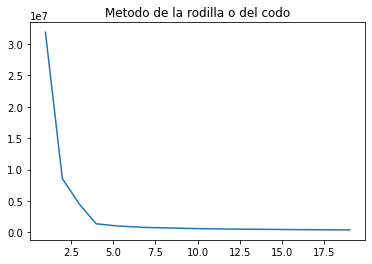

In [71]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
#plt.xlabel("Numero de grupos (k)")
#plt.ylabel("WCSS")
plt.show()

In [72]:
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

Elbow:  4


In [73]:
kmeans = KMeans(n_clusters=4,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)

[[3.50064782e+01 7.97938751e+00 1.69083602e+02 1.60011779e+00
  1.88103651e+00 5.21260306e+00 1.52667845e+01 6.30153121e+00
  2.01343816e+03 1.35453475e-02 2.95053004e-01 2.77385159e-01
  1.07773852e-01]
 [4.90000000e+01 8.00000000e+00 5.00000000e+03 1.00000000e+00
  2.00000000e+00 0.00000000e+00 5.00000000e+00 1.10000000e+01
  2.01700000e+03 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [9.63880866e+01 7.97533093e+00 1.69064235e+02 1.59626955e+00
  1.88929001e+00 5.03369434e+00 1.53922984e+01 6.58062575e+00
  2.01414681e+03 2.04572804e-02 3.40553550e-01 3.08664260e-01
  1.25150421e-01]
 [5.90000000e+01 8.00000000e+00 1.60000000e+02 1.00000000e+00
  2.00000000e+00 6.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [74]:
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(0)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
1416,34,8,170.0,2,2,3,28.0,7.0,2011.0,0.0,0.0,0.0,0.0,0
4277,52,8,171.0,1,2,4,7.0,8.0,2012.0,0.0,0.0,0.0,0.0,0
4278,52,8,175.0,1,2,4,7.0,8.0,2012.0,0.0,0.0,1.0,0.0,0
4279,16,8,180.0,1,2,6,6.0,2.0,2012.0,0.0,1.0,0.0,1.0,0
4284,57,8,173.0,3,2,5,24.0,12.0,2010.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36166,10,8,170.0,2,2,6,1.0,2.0,2018.0,0.0,0.0,1.0,0.0,0
36178,11,8,165.0,2,2,5,21.0,9.0,2016.0,0.0,1.0,0.0,0.0,0
36181,11,8,175.0,2,2,4,21.0,9.0,2016.0,0.0,1.0,0.0,0.0,0
36183,10,8,160.0,1,2,2,20.0,12.0,2012.0,0.0,0.0,0.0,0.0,0


In [75]:
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2","CP3"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,CP3,labels
0,1.617305,0.510086,0.081130,2
1,-1.370490,-0.079750,-0.377373,0
2,2.021062,3.588471,3.631747,2
3,-1.001143,0.328589,-0.301380,0
4,-0.896912,0.207230,-0.193577,0
...,...,...,...,...
3357,1.423008,-0.745732,0.168162,2
3358,1.906247,0.574942,0.489604,2
3359,-1.687345,0.906613,0.576906,0
3360,0.988655,-1.822922,0.351908,2


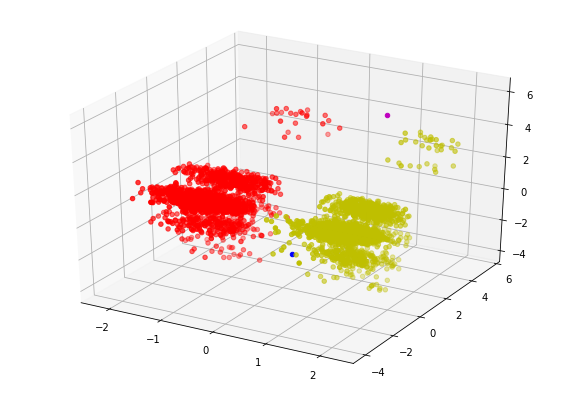

In [78]:
cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]
z_3 = cluster_3["CP3"]

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

 
# Creating plot
ax.scatter3D(x_0, y_0,z_0, c='r', marker='o')
ax.scatter3D(x_1, y_1,z_1, c='b', marker='o')
ax.scatter3D(x_2, y_2,z_2, c='y', marker='o')
ax.scatter3D(x_3, y_3,z_3, c='m', marker='o')


plt.show()